In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import dateutil.parser
from IPython.display import display
import math
import copy 

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.model_selection import train_test_split



pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)



In [ ]:
print(len(meow))

In [ ]:
#can skip to way later if using Jing Chun's or Harrison's preprocessed csv

In [ ]:
df=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/combined_per_player_block.csv")
df.head(3)


In [ ]:
df1=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/combined_per_player_rush.csv")
df1.head(3)

In [ ]:
print(set(df.pff_role))
print(set(df1.pff_role))
print(df.shape)
print(df1.shape)
print(df2.shape)

In [ ]:
frames = [df,df1]

result = pd.concat(frames)
print(result.shape)
result.head(3)

In [ ]:
result=result.drop(columns=['Unnamed: 0'])
result.head(3)

In [ ]:
print(set(result.pff_role))


In [ ]:
df2=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/2023/pffScoutingData.csv")
set(df2.playId)

In [ ]:
df3=df2[df2.columns[df2.columns.isin(['gameId','playId','nflId','pff_hit','pff_hurry','pff_sack'])]]
df3.head(3)

In [ ]:
print(result.shape)
print(df3.shape)

In [ ]:
df4=df3.merge(result, left_on=['gameId','playId','nflId'],right_on=['gameId','playId','nflId'])

In [ ]:
print(df4.shape)
df4.head(2)

In [ ]:
df5=df4.dropna()
print(df5.shape)
df5.head(2)

In [ ]:
df5['outcome']=0
df5.loc[df5['pff_hurry'] == 1, 'outcome']='Hurry'
df5.loc[df5['pff_hit'] == 1, 'outcome']='Hit'
df5.loc[df5['pff_sack'] == 1, 'outcome']='Sack'

In [ ]:
df5.head(2)

In [ ]:
x_df=df5[df5.columns[~df5.columns.isin(['gameId','playId','nflId','outcome'])]]
x_df.head(3)

In [ ]:
y_df=df5[df5.columns[df5.columns.isin(['outcome'])]]
y_df.head(3)

In [ ]:
#continue from here using Jing chun's.

In [2]:
new_df=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_1.csv")
new_df1=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_2.csv")
new_df.head(3)

,Unnamed: 0,playId,gameId,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top,hit,hurry,sack,bad_thing
0,1,100,2021091205,1,79.224000,2.165379,4.273408,0.000000,0.000000,0.000000,0.000000,217.635233,3.941905,7.215590,0.000000,0.000000,0.000000,0.00000,12707,0.000000,0.000000,1471.153017,92.498591,116.641363,-99.199424,0,0,0,0
1,2,100,2021091205,10,54.340933,2.090488,4.285844,-346.873572,57.667929,-337.586230,73.375147,187.745233,3.529407,6.367005,-1217.339965,76.233066,-1202.548632,106.33097,12716,1363.057395,201.502240,1558.680496,501.458099,633.989718,-301.990233,0,0,0,0
2,3,100,2021091205,11,50.359333,2.084440,4.290909,-311.417633,45.599327,-302.820681,58.078608,230.288000,3.501304,6.150107,-1345.483725,70.183668,-1315.285185,98.73391,12717,1038.638081,139.671426,1330.320348,462.586594,452.505465,-190.680610,0,0,0,0


In [3]:
# new_df=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/2023/by_frame_all.csv")
# new_df.head(2)

In [4]:
#new_df[new_df.bad_thing==0,]

In [5]:
#new_df1=new_df.drop(columns=['Unnamed: 0','playId','gameId.x','gameId.y','hit','hurry','sack'])
new_df1=new_df.drop(columns=['Unnamed: 0','playId','gameId','hit','hurry','sack'])


print(new_df1.shape)


(36617, 23)


In [6]:
new_df1.head(2)

,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top,bad_thing
0,1,79.224000,2.165379,4.273408,0.000000,0.000000,0.00000,0.000000,217.635233,3.941905,7.215590,0.000000,0.000000,0.000000,0.00000,12707,0.000000,0.00000,1471.153017,92.498591,116.641363,-99.199424,0
1,10,54.340933,2.090488,4.285844,-346.873572,57.667929,-337.58623,73.375147,187.745233,3.529407,6.367005,-1217.339965,76.233066,-1202.548632,106.33097,12716,1363.057395,201.50224,1558.680496,501.458099,633.989718,-301.990233,0


In [7]:
x_df=new_df1[new_df1.columns[~new_df1.columns.isin(['bad_thing'])]]
x_df.head(3)


,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top
0,1,79.224000,2.165379,4.273408,0.000000,0.000000,0.000000,0.000000,217.635233,3.941905,7.215590,0.000000,0.000000,0.000000,0.00000,12707,0.000000,0.000000,1471.153017,92.498591,116.641363,-99.199424
1,10,54.340933,2.090488,4.285844,-346.873572,57.667929,-337.586230,73.375147,187.745233,3.529407,6.367005,-1217.339965,76.233066,-1202.548632,106.33097,12716,1363.057395,201.502240,1558.680496,501.458099,633.989718,-301.990233
2,11,50.359333,2.084440,4.290909,-311.417633,45.599327,-302.820681,58.078608,230.288000,3.501304,6.150107,-1345.483725,70.183668,-1315.285185,98.73391,12717,1038.638081,139.671426,1330.320348,462.586594,452.505465,-190.680610


In [8]:
y_df=new_df1[new_df1.columns[new_df1.columns.isin(['bad_thing'])]]
y_df.head(3)

,bad_thing
0,0
1,0
2,0


In [9]:
bad=y_df.loc[y_df['bad_thing'] == 1]

not_bad=y_df.loc[y_df['bad_thing'] == 0]


print(bad.shape)
print(not_bad.shape) #imbalanced as expected

(16106, 1)
(20511, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.33, random_state=42)

In [11]:
X_train.head(2)
y_train.head(2)

,bad_thing
28274,0
23707,0


In [12]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:36:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:

print("Accuracy of Model::",accuracy_score(y_test,pred))



Accuracy of Model:: 0.7345249917245945


In [28]:
# from sklearn.inspection import plot_partial_dependence
# plot_partial_dependence(clf, new_df1, [0, 1]) 

XGBoostError: [19:38:08] /Users/travis/build/dmlc/xgboost/src/predictor/cpu_predictor.cc:258: Check failed: m->NumColumns() == model.learner_model_param->num_feature (23 vs. 22) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000014053cde4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000014065852d void xgboost::predictor::CPUPredictor::DispatchedInplacePredict<xgboost::data::ArrayAdapter>(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 365
  [bt] (2) 3   libxgboost.dylib                    0x0000000140654861 xgboost::predictor::CPUPredictor::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 401
  [bt] (3) 4   libxgboost.dylib                    0x00000001405db6c8 xgboost::gbm::GBTree::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 424
  [bt] (4) 5   libxgboost.dylib                    0x00000001405f014b xgboost::LearnerImpl::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::PredictionType, float, xgboost::HostDeviceVector<float>**, unsigned int, unsigned int) + 123
  [bt] (5) 6   libxgboost.dylib                    0x00000001405368cb void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 843
  [bt] (6) 7   libxgboost.dylib                    0x0000000140536253 XGBoosterPredictFromDense + 339
  [bt] (7) 8   libffi.dylib                        0x00007fff6766c905 ffi_call_unix64 + 85



In [14]:
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()


def plot_pr(recall,precision,average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: {0:0.6f}'.format(average_precision))
    plt.show()

    
def plot_learning_curve(results,epochs):
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='logloss-Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='logloss-Test')
    ax.plot(x_axis, results['validation_0']['auc'], label='auc-Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='auc-Test')
    ax.legend()
    plt.ylabel('Log Loss/AUC')
    plt.title('XGBoost Log Loss and AUC evolution')
    plt.show()


def run_xgboost_and_calculate_auc(df,
                                  target='target',
                                  drop='variable_to_find_and_exclude',
                                  w=1,
                                  plot_variables=False,
                                  plot_ROC_PR=False,
                                  plot_confusion=False,
                                  learning_rate=0.05,
                                  max_depth=10,
                                  esr=10,
                                  CV=True,
                                  title='',
                                  plot_all=False,
                                  ensembler=False,
                                  test_size=.2):
    '''
    Generic function to run xgboost to test the added changes and plot roc, learning and others and save the model.
    '''
    # features
    X = df.drop(target, axis=1)
    X = pd.get_dummies(X)
    
    # targets
    Y = df[target]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=test_size,
                                                        random_state=12345,
                                                        stratify=Y)

    print(f'variables: {len(list(X))}, rows:{len(X)}, flags:{sum(list(df[target]))}')
    
        
    clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')

    eval_set = [(X_train, Y_train), (X_test, Y_test)]

    if plot_all:
        plot_learning=True
        plot_variables=True
        plot_ROC_PR=True
        plot_confusion=True
        plot_graph_tree=True
        
    if CV:
        X = pd.concat([X_train,X_test])
        y = pd.concat([Y_train,Y_test])
        xgb_param = clf.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, y.values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=clf.get_params()['n_estimators'],
                          nfold=5,
                          metrics='auc',
                          early_stopping_rounds=esr)
        print(cvresult.tail(1))
        clf.set_params(n_estimators=cvresult.shape[0])

    clf.fit(X_train,
            Y_train,
            early_stopping_rounds=25,
            eval_metric=['auc','error','logloss'],
            eval_set=eval_set,
            verbose=False)

    Y_pred = clf.predict_proba(X_test)
    y_true = np.array(Y_test)
    y_scores = Y_pred[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(Y_test, y_scores)
    precision, recall, _ = precision_recall_curve(Y_test, y_scores)
    
    if plot_ROC_PR:
        plot_roc(fpr, tpr, roc_auc)
        plot_pr(recall,precision,average_precision)
    else:
        print('Area under ROC: %0.6f' % roc_auc)

    print("plotting variables of importance")
    if plot_variables:
        xgb.plot_importance(clf,max_num_features=20,importance_type='gain',xlabel='gain')
    
    print('\n', classification_report(y_true, y_scores.round()))
        
    if ensembler:
        return Y_test,Y_pred, y_scores

    print('-------------END EXECUTION-------------')

variables: 22, rows:36617, flags:16106
    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
29        0.881614       0.005925       0.842118      0.006077


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
No handles with labels found to put in legend.


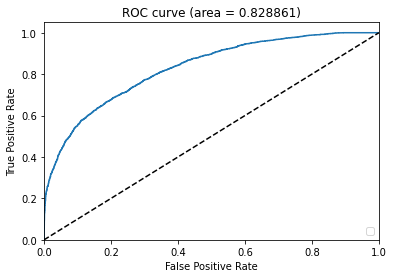

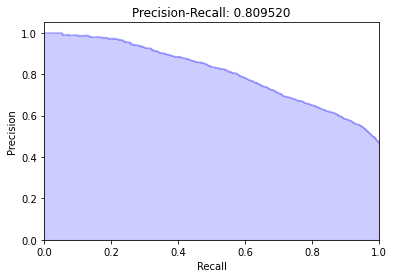

plotting variables of importance

               precision    recall  f1-score   support

           0       0.72      0.90      0.80      4103
           1       0.81      0.56      0.66      3221

    accuracy                           0.75      7324
   macro avg       0.77      0.73      0.73      7324
weighted avg       0.76      0.75      0.74      7324



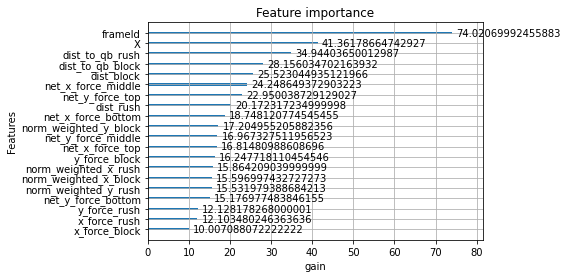

In [15]:
#ROC curves are appropriate when the observations are balanced between each class, 
#whereas precision-recall curves are appropriate for imbalanced datasets.
Y_test, Y_pred,y_scores = run_xgboost_and_calculate_auc(new_df1,target='bad_thing',plot_all=True,ensembler=True)


<!-- From confusion matrix above, we always guess 0 and 1 correctly. However, 
precision= true positive/(true positive+false positive). Out of all positives guessed, we have a few false positives

recall=true positive/(true positive+false negative). We have many false negative(0). 
 -->
 
 From confusion matrix above, we always guess 0 and 1 correctly. However, 
precision= true positive/(true positive+false positive). Out of all positives guessed, we have a few false positives

recall=true positive/(true positive+false negative). We have many false negative(0)


In [16]:
bad=y_df.loc[y_df['bad_thing'] == 1]

not_bad=y_df.loc[y_df['bad_thing'] == 0]


print(bad.shape)
print(not_bad.shape) #imbalanced as expected

(16106, 1)
(20511, 1)


In [17]:
len(Y_pred)

7324

In [18]:
#train on week1 and test on week2 

In [19]:
meow=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_2.csv")
meow=meow.drop(columns=['Unnamed: 0','playId','gameId','hit','hurry','sack'])
meow.head(3)

,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top,bad_thing
0,1,109.618567,2.171139,4.494689,0.000000,0.000000,0.000000,0.000000,144.828767,3.396529,6.891559,-21.912800,-36.244576,-19.588667,-33.827938,5996,4.374235,-5.794279,1215.900970,-843.514588,37.465748,-140.117522,0
1,10,152.038200,2.117770,4.769700,-449.060771,-244.060687,-441.468949,-237.889151,189.972100,2.944900,6.381071,-454.041091,-334.722194,-454.128662,-337.494695,6005,423.823119,-135.410288,1249.112044,-647.467302,297.969015,-202.043712,0
2,11,190.428600,2.121468,4.858845,-517.257256,-269.930805,-504.583493,-262.012459,107.186900,2.892160,6.352207,-455.287515,-289.861309,-448.540357,-292.605487,6006,516.441275,-174.603879,1218.401406,-513.742333,357.995673,-203.535207,0


In [20]:

def run_xgboost_and_calculate_auc1(df,
                                  target='target',
                                  drop='variable_to_find_and_exclude',
                                  w=1,
                                  plot_variables=False,
                                  plot_ROC_PR=False,
                                  plot_confusion=False,
                                  learning_rate=0.05,
                                  max_depth=10,
                                  esr=10,
                                  CV=True,
                                  title='',
                                  plot_all=False,
                                  ensembler=False,
                                  test_size=.2
                                 ):
    '''
    Generic function to run xgboost to test the added changes and plot roc, learning and others and save the model.
    '''
    # features
    X = df.drop(target, axis=1)
    X = pd.get_dummies(X)
    
    # targets
    Y = df[target]
    
    X_train=X
    Y_train=Y
    
    X_test=meow[meow.columns[~meow.columns.isin(['bad_thing'])]]
    Y_test=meow[meow.columns[meow.columns.isin(['bad_thing'])]]

    

    print(f'variables: {len(list(X))}, rows:{len(X)}, flags:{sum(list(df[target]))}')
    
        
    clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')

    eval_set = [(X_train, Y_train), (X_test, Y_test)]

    if plot_all:
        plot_learning=True
        plot_variables=True
        plot_ROC_PR=True
        plot_confusion=True
        plot_graph_tree=True
        
#     if CV:
#         X = pd.concat([X_train,X_test])
#         y = pd.concat([Y_train,Y_test])
#         xgb_param = clf.get_xgb_params()
#         xgtrain = xgb.DMatrix(X.values, y.values)
#         cvresult = xgb.cv(xgb_param,
#                           xgtrain,
#                           num_boost_round=clf.get_params()['n_estimators'],
#                           nfold=5,
#                           metrics='auc',
#                           early_stopping_rounds=esr)
#         print(cvresult.tail(1))
#         clf.set_params(n_estimators=cvresult.shape[0])

    clf.fit(X_train,
            Y_train,
            early_stopping_rounds=25,
            eval_metric=['auc','error','logloss'],
            eval_set=eval_set,
            verbose=False)
    print("it works until prediction")
    Y_pred = clf.predict_proba(X_test)
    y_true = np.array(Y_test)
    y_scores = Y_pred[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(Y_test, y_scores)
    precision, recall, _ = precision_recall_curve(Y_test, y_scores)
    
    if plot_ROC_PR:
        plot_roc(fpr, tpr, roc_auc)
        plot_pr(recall,precision,average_precision)
    else:
        print('Area under ROC: %0.6f' % roc_auc)

    print("plotting variables of importance")
    if plot_variables:
        xgb.plot_importance(clf,max_num_features=20,importance_type='gain',xlabel='gain')
    
    print('\n', classification_report(y_true, y_scores.round()))
        
    if ensembler:
        return Y_test,Y_pred, y_scores

    print('-------------END EXECUTION-------------')

variables: 22, rows:36617, flags:16106


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
No handles with labels found to put in legend.


it works until prediction


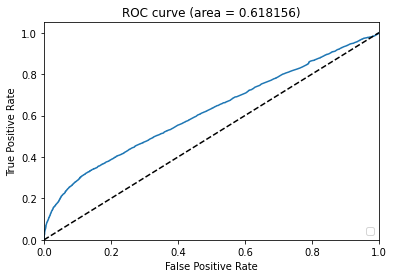

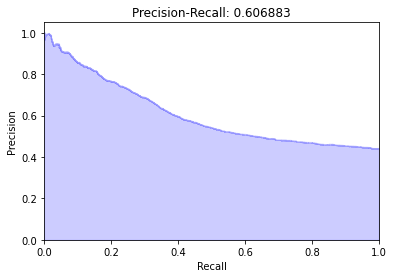

plotting variables of importance

               precision    recall  f1-score   support

           0       0.62      0.86      0.72     19285
           1       0.65      0.34      0.44     15160

    accuracy                           0.63     34445
   macro avg       0.64      0.60      0.58     34445
weighted avg       0.64      0.63      0.60     34445



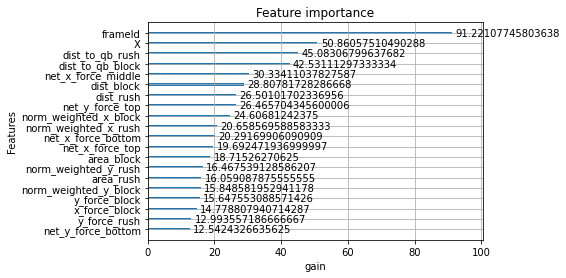

In [79]:
Y_test, Y_pred,y_scores = run_xgboost_and_calculate_auc1(new_df1,target='bad_thing',plot_all=True,ensembler=True)



In [35]:
print(len(new_df))
new_df2=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_2.csv")
print(len(new_df2))
new_df3=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_3.csv")
new_df4=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_4.csv")
new_df5=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_5.csv")
new_df6=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_6.csv")
new_df7=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_7.csv")
new_df8=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/features_all_8.csv")

# week1_6train = pd.concat([new_df, new_df2,new_df3,new_df4,new_df5,new_df6], axis=0)
# week7_8test=pd.concat([new_df7,new_df8], axis=0)

week1_7train = pd.concat([new_df, new_df2,new_df3,new_df4,new_df5,new_df6,new_df7], axis=0)
week8test=new_df8



36617
34445


In [36]:
week1_7train=week1_7train.drop(columns=['Unnamed: 0','playId','gameId','hit','hurry','sack'])
week8test=week8test.drop(columns=['Unnamed: 0','playId','gameId','hit','hurry','sack'])


In [37]:
week1_7train.head(2)

,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top,bad_thing
0,1,79.224000,2.165379,4.273408,0.000000,0.000000,0.00000,0.000000,217.635233,3.941905,7.215590,0.000000,0.000000,0.000000,0.00000,12707,0.000000,0.00000,1471.153017,92.498591,116.641363,-99.199424,0
1,10,54.340933,2.090488,4.285844,-346.873572,57.667929,-337.58623,73.375147,187.745233,3.529407,6.367005,-1217.339965,76.233066,-1202.548632,106.33097,12716,1363.057395,201.50224,1558.680496,501.458099,633.989718,-301.990233,0


In [43]:
#for model trained on multiple weeks 
def run_xgboost_and_calculate_auc2(df,
                                  target='target',
                                  drop='variable_to_find_and_exclude',
                                  w=1,
                                  plot_variables=False,
                                  plot_ROC_PR=False,
                                  plot_confusion=False,
                                  learning_rate=0.05,
                                  max_depth=10,
                                  esr=10,
                                  CV=True,
                                  title='',
                                  plot_all=False,
                                  ensembler=False,
                                  test_size=.2
                                 ):
    '''
    Generic function to run xgboost to test the added changes and plot roc, learning and others and save the model.
    '''
    # features
    #X = week1_6train.drop(target, axis=1)
    X = week1_7train.drop(target, axis=1)
    X = pd.get_dummies(X)
    
    # targets
    #Y = week1_6train[target]
    Y = week1_7train[target]
    
    X_train=X
    Y_train=Y
    
#     X_test=week7_8test[week7_8test.columns[~week7_8test.columns.isin(['bad_thing'])]]
#     Y_test=week7_8test[week7_8test.columns[week7_8test.columns.isin(['bad_thing'])]]
    X_test=week8test[week8test.columns[~week8test.columns.isin(['bad_thing'])]]
    Y_test=week8test[week8test.columns[week8test.columns.isin(['bad_thing'])]]

    

    print(f'variables: {len(list(X))}, rows:{len(X)}, flags:{sum(list(df[target]))}')
    
        
    clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')

    eval_set = [(X_train, Y_train), (X_test, Y_test)]

    if plot_all:
        plot_learning=True
        plot_variables=True
        plot_ROC_PR=True
        plot_confusion=True
        plot_graph_tree=True
        
#     if CV:
#         X = pd.concat([X_train,X_test])
#         y = pd.concat([Y_train,Y_test])
#         xgb_param = clf.get_xgb_params()
#         xgtrain = xgb.DMatrix(X.values, y.values)
#         cvresult = xgb.cv(xgb_param,
#                           xgtrain,
#                           num_boost_round=clf.get_params()['n_estimators'],
#                           nfold=5,
#                           metrics='auc',
#                           early_stopping_rounds=esr)
#         print(cvresult.tail(1))
#         clf.set_params(n_estimators=cvresult.shape[0])

    clf.fit(X_train,
            Y_train,
            early_stopping_rounds=25,
            eval_metric=['auc','error','logloss'],
            eval_set=eval_set,
            verbose=False)
    print("it works until prediction")
    Y_pred = clf.predict_proba(X_test)
    y_true = np.array(Y_test)
    y_scores = Y_pred[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(Y_test, y_scores)
    precision, recall, _ = precision_recall_curve(Y_test, y_scores)
    
    if plot_ROC_PR:
        plot_roc(fpr, tpr, roc_auc)
        plot_pr(recall,precision,average_precision)
    else:
        print('Area under ROC: %0.6f' % roc_auc)

    print("plotting variables of importance")
    if plot_variables:
        xgb.plot_importance(clf,max_num_features=20,importance_type='gain',xlabel='gain')
    
    print('\n', classification_report(y_true, y_scores.round()))
        
    if ensembler:
        return clf,X_train,Y_test,Y_pred, y_scores

    print('-------------END EXECUTION-------------')

variables: 22, rows:242418, flags:16106


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
No handles with labels found to put in legend.


it works until prediction


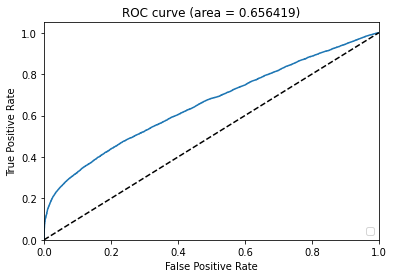

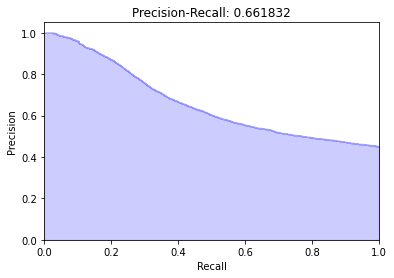

plotting variables of importance

               precision    recall  f1-score   support

           0       0.62      0.91      0.74     17681
           1       0.73      0.32      0.44     14430

    accuracy                           0.64     32111
   macro avg       0.68      0.61      0.59     32111
weighted avg       0.67      0.64      0.61     32111



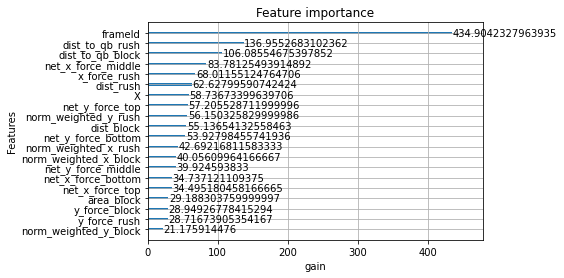

In [44]:
model,X_train,Y_test, Y_pred,y_scores = run_xgboost_and_calculate_auc2(new_df1,target='bad_thing',plot_all=True,ensembler=True)



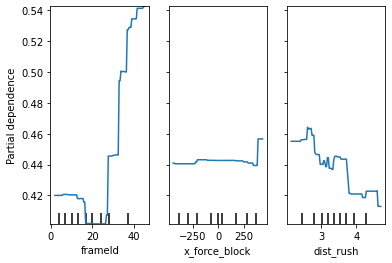

In [51]:
from sklearn.inspection import plot_partial_dependence
#,feature_names=['framdId','dist_to_qb_rush','dist_to_qb_block']
plot_partial_dependence(clf, features=[0,4,9],X=X_train) 

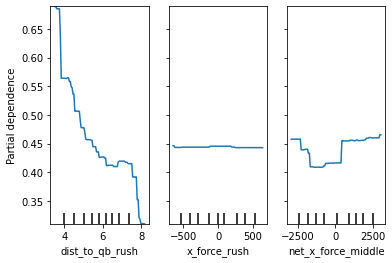

In [52]:
#'net_x_force_middle',x force rush, dist rush

plot_partial_dependence(clf, features=[10,11,18],X=X_train) 

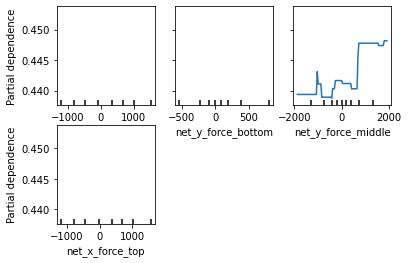

In [53]:
#net_x_force_bottom,net_y_force_bottom,net_y_force_middle,net_x_force_top
plot_partial_dependence(clf, features=[16,17,19,20],X=X_train) 

In [42]:
new_df1.head(2)

,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,area_rush,dist_rush,dist_to_qb_rush,x_force_rush,y_force_rush,norm_weighted_x_rush,norm_weighted_y_rush,X,net_x_force_bottom,net_y_force_bottom,net_x_force_middle,net_y_force_middle,net_x_force_top,net_y_force_top,bad_thing
0,1,79.224000,2.165379,4.273408,0.000000,0.000000,0.00000,0.000000,217.635233,3.941905,7.215590,0.000000,0.000000,0.000000,0.00000,12707,0.000000,0.00000,1471.153017,92.498591,116.641363,-99.199424,0
1,10,54.340933,2.090488,4.285844,-346.873572,57.667929,-337.58623,73.375147,187.745233,3.529407,6.367005,-1217.339965,76.233066,-1202.548632,106.33097,12716,1363.057395,201.50224,1558.680496,501.458099,633.989718,-301.990233,0


In [ ]:
#check before feature engineering 

new_df2=copy.deepcopy(new_df1)
new_df2['net_xy_force_middle_ratio']=new_df2['net_x_force_middle_name']/new_df2['net_y_force_middle_name']
new_df2['net_xy_force_top_ratio']=new_df2['net_x_force_top_name']/new_df2['net_y_force_y_name']
new_df2['dist_to_qb_ratio_area']=new_df2['dist_to_qb_name']/new_df2['area_name']
new_df2.head(2)

In [ ]:

new_df2.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
new_df2.dropna(inplace=True)
print(new_df2.isnull().values.any())


In [ ]:
x_df1=new_df2[new_df2.columns[~new_df2.columns.isin(['bad_thing'])]]
y_df1=new_df2[new_df2.columns[new_df2.columns.isin(['bad_thing'])]]

In [ ]:
count = np.isinf(new_df2).values.sum()
print("Infinity values... ",count)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df1, y_df1, test_size=0.33, random_state=42)

In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# print(X_train.isnull().values.any())
# print(X_test.isnull().values.any())
# print(y_train.isnull().values.any())
# print(y_test.isnull().values.any())

In [ ]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,pred))

#didn't perform better

In [ ]:
#grid search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [4,5,6],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [30,40,50] #number of trees, change it to 1000 for better results
            }

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=parameters, scoring='roc_auc', cv=skf.split(x_df1, y_df1), verbose=3, random_state=42 )

In [ ]:
random_search.fit(x_df1, y_df1)


In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
clf = xgb.XGBClassifier(max_depth=6,subsample=0.8, n_estimators=50,objective='binary:logistic',learning_rate=0.05,colsample_bytree=0.7)
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,pred))



In [ ]:
#do some random forest